# Filtros FIR Pasa Banda. Diseño con Ventanas

In [1]:
#NOTE importar bibliotecas
import numpy as np
import sympy as sb

from matplotlib import pyplot as plt
from scipy      import signal

In [2]:
def firdesign(N, fc, sr, ftype='low',info=False):
    sinc = lambda ft,tk: np.sin(2*np.pi*ft*tk)/(np.pi*tk)
    
    ft = fc/float(sr)
    M  = N+1
    tk = np.arange(1,M+1) - (M+1)//2
    
    tk[(M)//2] = -1
    
    if 'low' in ftype:
        fir       = sinc(ft,tk) 
        fir[(M)//2] = 2*ft
        tk [(M)//2]  = 0
    
    elif 'high' in ftype:
        fir       = -sinc(ft,tk) 
        fir[(M)//2] = 1-2*ft
        tk[(M)//2]  = 0
    
    else:
        print ('No se especifico tipo de filtro')
        fir = np.zeros(tk.shape[0])
        
    if info:
        print (tk,M)
        plt.plot(ft*tk,fir,'-o',markersize=9,linewidth=3)
        plt.grid(True)
        
        plt.show()
    return fir

In [3]:
def freq_hz(S,sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

def plot_fir_fr( fir,sr ):
    w,W,H = freq_hz(fir,sr)
    
    plt.figure( figsize=(8,6) )
    plt.title('Magnitud [dB]')
    plt.grid(True)
    plt.plot( w,H,'b',linewidth=3 )
    
    plt.figure( figsize=(8,6) )
    plt.title('Fase [grados]')
    plt.plot( w,W,'g',linewidth=3 )
    plt.grid(True)
    plt.show()


[-5 -4 -3 -2 -1  0  1  2  3  4  5] 11


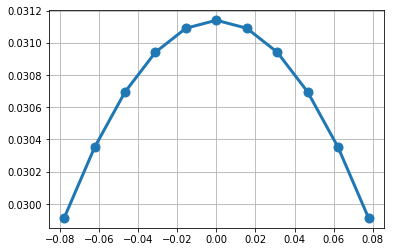

In [4]:
N   = 10
M   = N+1
fcl = 9.7
fch = 2.7
sr  = 623

cl_fir = firdesign(N,fcl,sr,info=True)
ch_fir = firdesign(N,fch,sr, ftype='high')
cb_fir =  ch_fir + cl_fir

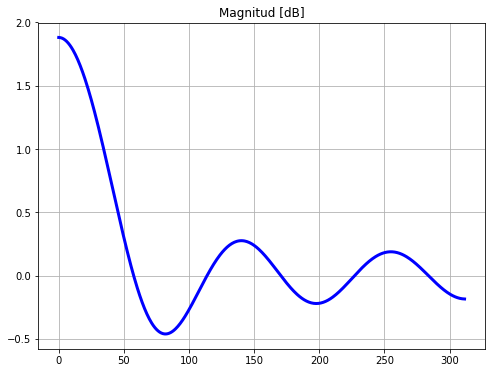

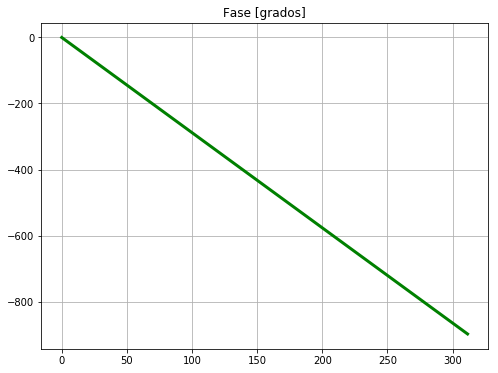

In [5]:
plot_fir_fr(cb_fir,sr)

Ventanas

In [6]:
def hann(M):
    k = np.arange(1,M+1)
    
    if (M%2)==0:
        hann = .5 - .5*np.cos( 2*np.pi*k/M )
    else:
        hann = .5 - .5*np.cos( 2*np.pi*k/(M+1) )
    
    return hann

def hamm(M):
    k = np.arange(1,M+1)
    
    if M%2==0:
        hamm = .54 - .46*np.cos( 2*np.pi*k/M )
    else:
        hamm = .54 - .46*np.cos( 2*np.pi*k/(M+1) )
    
    return hamm

def gauss(M,sr):
    tk = np.arange(1,M+1) - (M+1)//2
    if M%2==0:
        gauss = (2*np.pi)**-.5 * np.exp( -.5*(tk/sr  )**2 )
    else:
        gauss = (2*np.pi)**-.5 * np.exp( -.5*(tk/sr)**2 )
    
    return gauss

In [36]:
print_list = lambda X: ', '.join( ['{:4.4f}'.format(i) for i in X ] )

N   = 10
M   = N+1
fcl = 9.7
fch = 2.7
sr  = 745


cl_fir = firdesign(N,fcl,sr )
ch_fir = firdesign(N,fch,sr, ftype='high')
cb_fir =  ch_fir + cl_fir

#plot_fir_fr( cb_fir*hann(M),sr )
print('FIR: '   , print_list(cb_fir) )
print('WHam: '  , print_list(hamm(M)) )
print('Hamm: '  , print_list(cb_fir*hamm(M)) )
print('WGauss: ', print_list( gauss(M,1) )  )
print('Gauss: ' , print_list( cb_fir*gauss(M,1) )  )

FIR:  0.0181, 0.0183, 0.0185, 0.0187, 0.0188, 1.0188, 0.0188, 0.0187, 0.0185, 0.0183, 0.0181
WHam:  0.1416, 0.3100, 0.5400, 0.7700, 0.9384, 1.0000, 0.9384, 0.7700, 0.5400, 0.3100, 0.1416
Hamm:  0.0026, 0.0057, 0.0100, 0.0144, 0.0176, 1.0188, 0.0176, 0.0144, 0.0100, 0.0057, 0.0026
WGauss:  0.0000, 0.0001, 0.0044, 0.0540, 0.2420, 0.3989, 0.2420, 0.0540, 0.0044, 0.0001, 0.0000
Gauss:  0.0000, 0.0000, 0.0001, 0.0010, 0.0045, 0.4064, 0.0045, 0.0010, 0.0001, 0.0000, 0.0000


In [48]:
0.02126*.1416

0.003010416

In [23]:
s, T, Wc, C, Z = sb.symbols('s T Wc K, Z')

p = (s - sb.sqrt(3)/2 + 1/2j)*(s - sb.sqrt(3)/2 - 1/2j)*(s+1)
h = 1/p.expand()
sb.pprint(h)

#C = 2/T
L = C*(Z-1)/(Z+1)

sb.pprint(  h.subs( {s:L} )  )
print('\n')
h.subs({s:Wc/s}).subs( {s:L} ).simplify().expand().simplify().collect(Z).collect(C)


                 1                  
────────────────────────────────────
 3       2    2                     
s  - √3⋅s  + s  - √3⋅s + 1.0⋅s + 1.0
                                       1                                      
──────────────────────────────────────────────────────────────────────────────
 3        3       2        2    2        2                                    
K ⋅(Z - 1)    √3⋅K ⋅(Z - 1)    K ⋅(Z - 1)    √3⋅K⋅(Z - 1)   1.0⋅K⋅(Z - 1)     
─────────── - ────────────── + ─────────── - ──────────── + ───────────── + 1.
         3              2               2       Z + 1           Z + 1         
  (Z + 1)        (Z + 1)         (Z + 1)                                      

 
─
 
 
0
 
 




K**3*(Z**3 - 3*Z**2 + 3*Z - 1)/(-1.0*K**3 + K**2*(-sqrt(3)*Wc + 1.0*Wc) + K*(-Wc**2 + sqrt(3)*Wc**2) + Wc**3 + Z**3*(1.0*K**3 + K**2*(-sqrt(3)*Wc + 1.0*Wc) + K*(-sqrt(3)*Wc**2 + Wc**2) + Wc**3) + Z**2*(-3.0*K**3 + K**2*(-1.0*Wc + sqrt(3)*Wc) + K*(-sqrt(3)*Wc**2 + Wc**2) + 3*Wc**3) + Z*(3.0*K**3 + K**2*(-1.0*Wc + sqrt(3)*Wc) + K*(-Wc**2 + sqrt(3)*Wc**2) + 3*Wc**3))

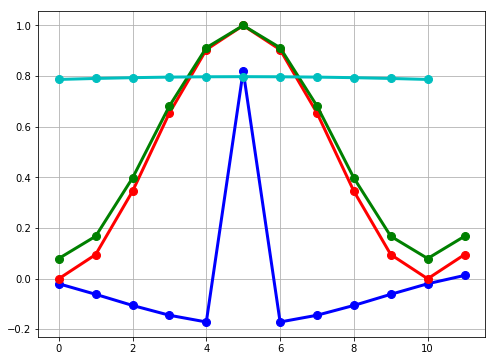

In [9]:
w_hann  = hann (M)
w_hamm  = hamm (M)
w_gauss = gauss(M,sr)

plt.figure(figsize=(8,6))
plt.plot(ch_fir ,'-bo',linewidth=3,markersize=8)
plt.plot(w_hann ,'-ro',linewidth=3,markersize=8)
plt.plot(w_hamm ,'-go',linewidth=3,markersize=8)
plt.plot(2*w_gauss,'-co',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


## Examen III

In [32]:
def get_H_cheby(a,b,s):
    L = a.shape[0]//2
    H = []
    for i,j in zip( a[:L],b[:L] ):
        H.append( 1/(s**2 - 2*i*s + (i)**2+(j)**2) )
    
    if a.shape[0]%2 != 0:
        H.append( 1/(s-a[L]) )
    
    return np.product( np.array(H) )

def cheb1(Rdb,n,s,r=4):
    k   = np.arange(n)
    
    eps = eps_(Rdb)
    G   = G_( eps,n )
    a   = A_(G)
    b   = B_(G)
    
    alphas = alphas_(k,n,b)
    betas  = alphas_(k,n,a)

    print('eps: {:4.4f}, G: {:4.4f}'.format(eps,G))
    print('a: {:4.4f}  , b: {:4.4f}'.format(a,b),'\n')
    print( 'alphas: ',print_list(alphas) )
    print( 'betas: ' ,print_list(betas ) )
    
    return get_H_cheby( alphas.round(r),betas.round(r),s )

eps_ = lambda Rdb  : ( 10**(Rdb/10)-1 )**(.5)
G_   = lambda eps,n: (    (  1+(1+eps**2)**(.5) )/eps    )**(1/n)
A_   = lambda G    :  (G**2+1)/(2*G)
B_   = lambda G    :  (G**2-1)/(2*G)

alphas_ = lambda k,n,c: -np.sin(  (2*k+1)/(2*n)*np.pi  )*c
betas_  = lambda k,n,c:  np.cos(  (2*k+1)/(2*n)*np.pi  )*c

In [33]:
Rdb = 0.1
n   = 3

cheb1(Rdb,n,s).subs({s:Wc/s}).simplify()


eps: 0.1526, G: 2.3622
a: 1.3927  , b: 0.9694 

alphas:  -0.4847, -0.9694, -0.4847
betas:  -0.6964, -1.3927, -0.6964


s**3/((Wc + 0.9694*s)*(Wc**2 + 0.9694*Wc*s + 0.71990705*s**2))

In [34]:
Rdb = 0.75
n   = 4

H = cheb1(Rdb,n,s)

H.subs( {s:L} ).simplify().expand().simplify().collect(Z)



eps: 0.4342, G: 1.4813
a: 1.0782  , b: 0.4031 

alphas:  -0.1543, -0.3724, -0.3724, -0.1543
betas:  -0.4126, -0.9961, -0.9961, -0.4126


(Z**4 + 4*Z**3 + 6*Z**2 + 4*Z + 1)/(C**4 - 1.0534*C**3 + 1.5547895*C**2 - 0.493521196742*C + Z**4*(C**4 + 1.0534*C**3 + 1.5547895*C**2 + 0.493521196742*C + 0.219447447061833) + Z**3*(-4*C**4 - 2.1068*C**3 + 0.987042393484*C + 0.87778978824733) + Z**2*(6*C**4 - 3.109579*C**2 + 1.316684682371) + Z*(-4*C**4 + 2.1068*C**3 - 0.987042393484*C + 0.87778978824733) + 0.219447447061833)

In [35]:
Rdb = 0.1
n   = 2

H = cheb1(Rdb,n,s)

H.subs( {s:L} ).simplify().expand().simplify().collect(Z)

eps: 0.1526, G: 3.6305
a: 1.9530  , b: 1.6775 

alphas:  -1.1862, -1.1862
betas:  -1.3809, -1.3809


(Z**2 + 2*Z + 1)/(C**2 - 2.3724*C + Z**2*(C**2 + 2.3724*C + 3.31395525) + Z*(6.6279105 - 2*C**2) + 3.31395525)